In [1]:

import pandas as pd
import csv
import os
import os.path
import pymorphy2
import regex as re
import main
from collections import Counter

# Пункт 1

С использованием средств библиотеки Pandas прочитать все данные (в DataFrame будет несколько столбцов, в зависимости от варианта, например, у варианта 10 - Количество звезд, Текст рецензии).

In [13]:
column_name = ['class_mark', 'text_review', 'count_words']
reviews_df = main.add_to_dataframe()
print(reviews_df)

     class_mark                                        text_review
0          good  Зеленая миля\n'Они помогли ему убить себя и та...
1          good  Зеленая миля\n'Боже, иногда Зеленая миля так д...
2          good  Зеленая миля\nОни помогли ему убить себя\n\n«О...
3          good  Зеленая миля\n«Когда призовет Господь на свой ...
4          good  Зеленая миля\nОбвиненный в страшном преступлен...
...         ...                                                ...
1995        bad  Сумерки\nФильм «ни о чем»! Не понимаю, что мно...
1996        bad  Сумерки\nСначала был Макс Шрек.\n\n\nПотом Бел...
1997        bad  Сумерки\nНа экраны вышла первая часть вампирск...
1998        bad  Сумерки\nСемнадцатилетняя Белла Свон переезжае...
1999        bad  Сумерки\nМоё отношение к данному фильму весьма...

[2000 rows x 2 columns]


# Пункт 2 

# сделан сразу в пункте 1
Произвести именование колонок сформированного DataFrame в соответствии с рекомендациями, полученными на соответствующей лекции.

# Пункт 3

Произвести проверку на наличие невалидных значений в колонках (NaN, None и т.п.). В случае нахождения выполнить обработку таких значений.

In [3]:
print('Столбец: <', column_name[0], '> пустой? -',
          main.check_nan(reviews_df, column_name[0]))
print('Столбец: <', column_name[1], '> пустой? -',
        main.check_nan(reviews_df, column_name[1]))


Столбец: < class_mark > пустой? - False
Столбец: < text_review > пустой? - False


# Пункт 4

Добавить в DataFrame столбец, который будет содержать информацию о кол-ве слов в ячейке, содержащей текстовую информацию.

In [14]:
count_word = main.count_words_in_text(reviews_df, column_name[1])
reviews_df[column_name[2]] = pd.Series(count_word)
print(reviews_df)

     class_mark                                        text_review  \
0          good  Зеленая миля\n'Они помогли ему убить себя и та...   
1          good  Зеленая миля\n'Боже, иногда Зеленая миля так д...   
2          good  Зеленая миля\nОни помогли ему убить себя\n\n«О...   
3          good  Зеленая миля\n«Когда призовет Господь на свой ...   
4          good  Зеленая миля\nОбвиненный в страшном преступлен...   
...         ...                                                ...   
1995        bad  Сумерки\nФильм «ни о чем»! Не понимаю, что мно...   
1996        bad  Сумерки\nСначала был Макс Шрек.\n\n\nПотом Бел...   
1997        bad  Сумерки\nНа экраны вышла первая часть вампирск...   
1998        bad  Сумерки\nСемнадцатилетняя Белла Свон переезжае...   
1999        bad  Сумерки\nМоё отношение к данному фильму весьма...   

      count_words  
0             117  
1            1448  
2             639  
3             751  
4             361  
...           ...  
1995          176  

# Пункт 5

С использованием Pandas вычислить статистическую информацию для столбцов, содержащих числовую информацию.

In [5]:
stat = main.statistical_information(reviews_df, column_name[2])
print(stat)

count    2000.000000
mean      378.286500
std       221.887488
min        13.000000
25%       215.000000
50%       324.000000
75%       486.500000
max      2427.000000
Name: count_words, dtype: float64


# Пункт 6

Написать функцию, которая на вход принимает DataFrame и количество слов, а возвращает отфильтрованный по количеству слов DataFrame. Условие фильтрации - в новый DataFrame включаются те строки, для которых значение в столбце с количеством слов  ≤  заданного значения.

In [15]:
filtered_reviews_df = main.filtered_dataframe_word(
        reviews_df, column_name[2], 1200)
print(filtered_reviews_df)

    class_mark                                        text_review  count_words
1         good  Зеленая миля\n'Боже, иногда Зеленая миля так д...         1448
400       good  Матрица\nИщите в фильме смысл. Вы его увидите....         2427
674       good  Побег из Шоушенка\n«Побег из Шоушенка» - экран...         1317
676       good  Побег из Шоушенка\nЭто случилось в Америке поч...         1469


# Пункт 7

Написать функцию, которая на вход принимает DataFrame и метку класса (например, Количество звезд), а возвращает отфильтрованный по заданной метке DataFrame.

In [7]:
reviews_good_df = main.filtered_dataframe_class(
        reviews_df, column_name[0], 'good')

    
print(reviews_good_df)

    class_mark                                        text_review  count_words
0         good  Зеленая миля\n'Они помогли ему убить себя и та...          117
1         good  Зеленая миля\n'Боже, иногда Зеленая миля так д...         1448
2         good  Зеленая миля\nОни помогли ему убить себя\n\n«О...          639
3         good  Зеленая миля\n«Когда призовет Господь на свой ...          751
4         good  Зеленая миля\nОбвиненный в страшном преступлен...          361
..         ...                                                ...          ...
995       good  1+1\nЯ, честно, до появления этого фильма в то...          331
996       good  1+1\nДрузья давно советовали мне посмотреть эт...          448
997       good  1+1\nВсегда, когда смотришь хороший европейски...          198
998       good  1+1\nПосмотрел этот фильм сравнительно недавно...          278
999       good  Тайна Коко\nЭто надо видеть!!!Наверное, это бу...          394

[1000 rows x 3 columns]


# Пункт 8

Выполнить группировку DataFrame по метке класса с вычислением максимального, минимального и среднего значения по количеству слов.

In [8]:
stat_good = main.statistical_information(reviews_good_df, column_name[2])
print('\nДля положительных отзывов:\n')
print('Минимальное кол-во слов:', stat_good['min'])
print('Максимальное кол-во слов:', stat_good['max'])
print('Среднее кол-во слов:', stat_good['mean'])

reviews_bad_df = main.filtered_dataframe_class(reviews_df, column_name[0], 'bad')

stat_bad = main.statistical_information(reviews_bad_df, column_name[2])
print('\nДля отрицательных отзывов:\n')
print('Минимальное кол-во слов:', stat_bad['min'])
print('Максимальное кол-во слов:', stat_bad['max'])
print('Среднее кол-во слов:', stat_bad['mean'])


Для положительных отзывов:

Минимальное кол-во слов: 13.0
Максимальное кол-во слов: 2427.0
Среднее кол-во слов: 370.85

Для отрицательных отзывов:

Минимальное кол-во слов: 49.0
Максимальное кол-во слов: 1015.0
Среднее кол-во слов: 385.723


# Пункт 9 

Написать функцию, которая на вход принимает DataFrame и метку класса, а возвращает гистограмму для слов. Для расчета гистограммы необходимо будет разбить блоки текста на слова и выполнить процедуру лемматизации для каждого слова (используя библиотеку nltk). 

Была использована другая библиотека - pymystem3.

В данном блоке кода выполняется лемматизация слов (приведение слов к начальной форме)

In [ ]:
output_lemma = list
output_lemma = main.lemmatize_for_class_mark(reviews_df, 'good')
output_lemma.sort()

Ниже происходит подсчет количества уникальных слов (с помощью словаря), далее идет выборка по части речи и кол-ву повторений слова.

In [19]:
word_dict = Counter(output_lemma)
word_dict = dict(word_dict)
word_dict_upd = {}
#print(word_dict_upd)
bad_functors_pos = {'INTJ', 'PRCL', 'CONJ', 'PREP', 'NPRO'}
bad_words = {'этот', 'мой', 'наш', 'один', 'который', 'весь', 'быть'}
verb_functors_pos = {'VERB', 'INFN'}
good_functors_pos = {'ADJS', 'ADJF'}
for key, value in word_dict.items(): 
    main.pos(key)   
    if value > 500 and  main.pos(key) in verb_functors_pos and key != ' ' and key not in bad_words:
        word_dict_upd[key] = value

print(word_dict_upd)



{'говорить': 606, 'понимать': 687, 'посмотреть': 518, 'сказать': 761, 'смотреть': 732, 'снимать': 525, 'становиться': 642}


# Пункт 10

Выполнить визуализацию гистограммы, полученной из пункта 9, с помощью средств библиотеки matplotlib. Соответствующие оси, графики и значения необходимо подписать.

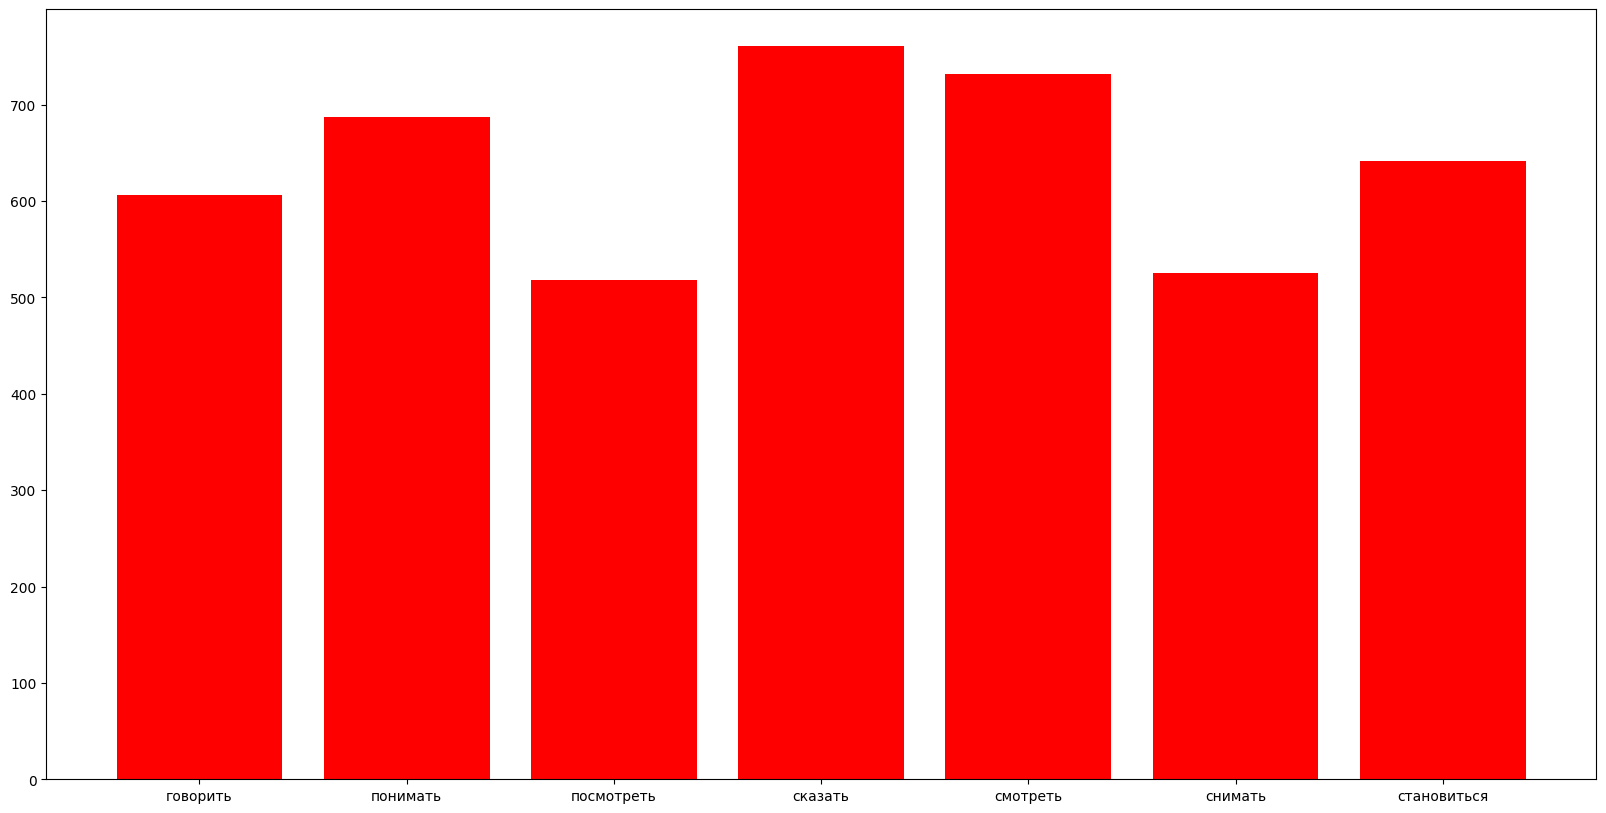

In [21]:
from matplotlib import pyplot as plt
import numpy as np

fig = plt.figure(figsize=(20,10))
ax = fig.add_subplot()

ax.bar(list(word_dict_upd.keys()), word_dict_upd.values(), color='r')

plt.show()

# Для плохих отзывов

В данном блоке кода выполняется лемматизация слов (приведение слов к начальной форме)

In [22]:
from matplotlib import pyplot as plt
import numpy as np

output_lemma = list
output_lemma = main.lemmatize_for_class_mark(reviews_df, 'bad')


Ниже происходит подсчет количества уникальных слов (с помощью словаря), далее идет выборка по части речи и кол-ву повторений слова.

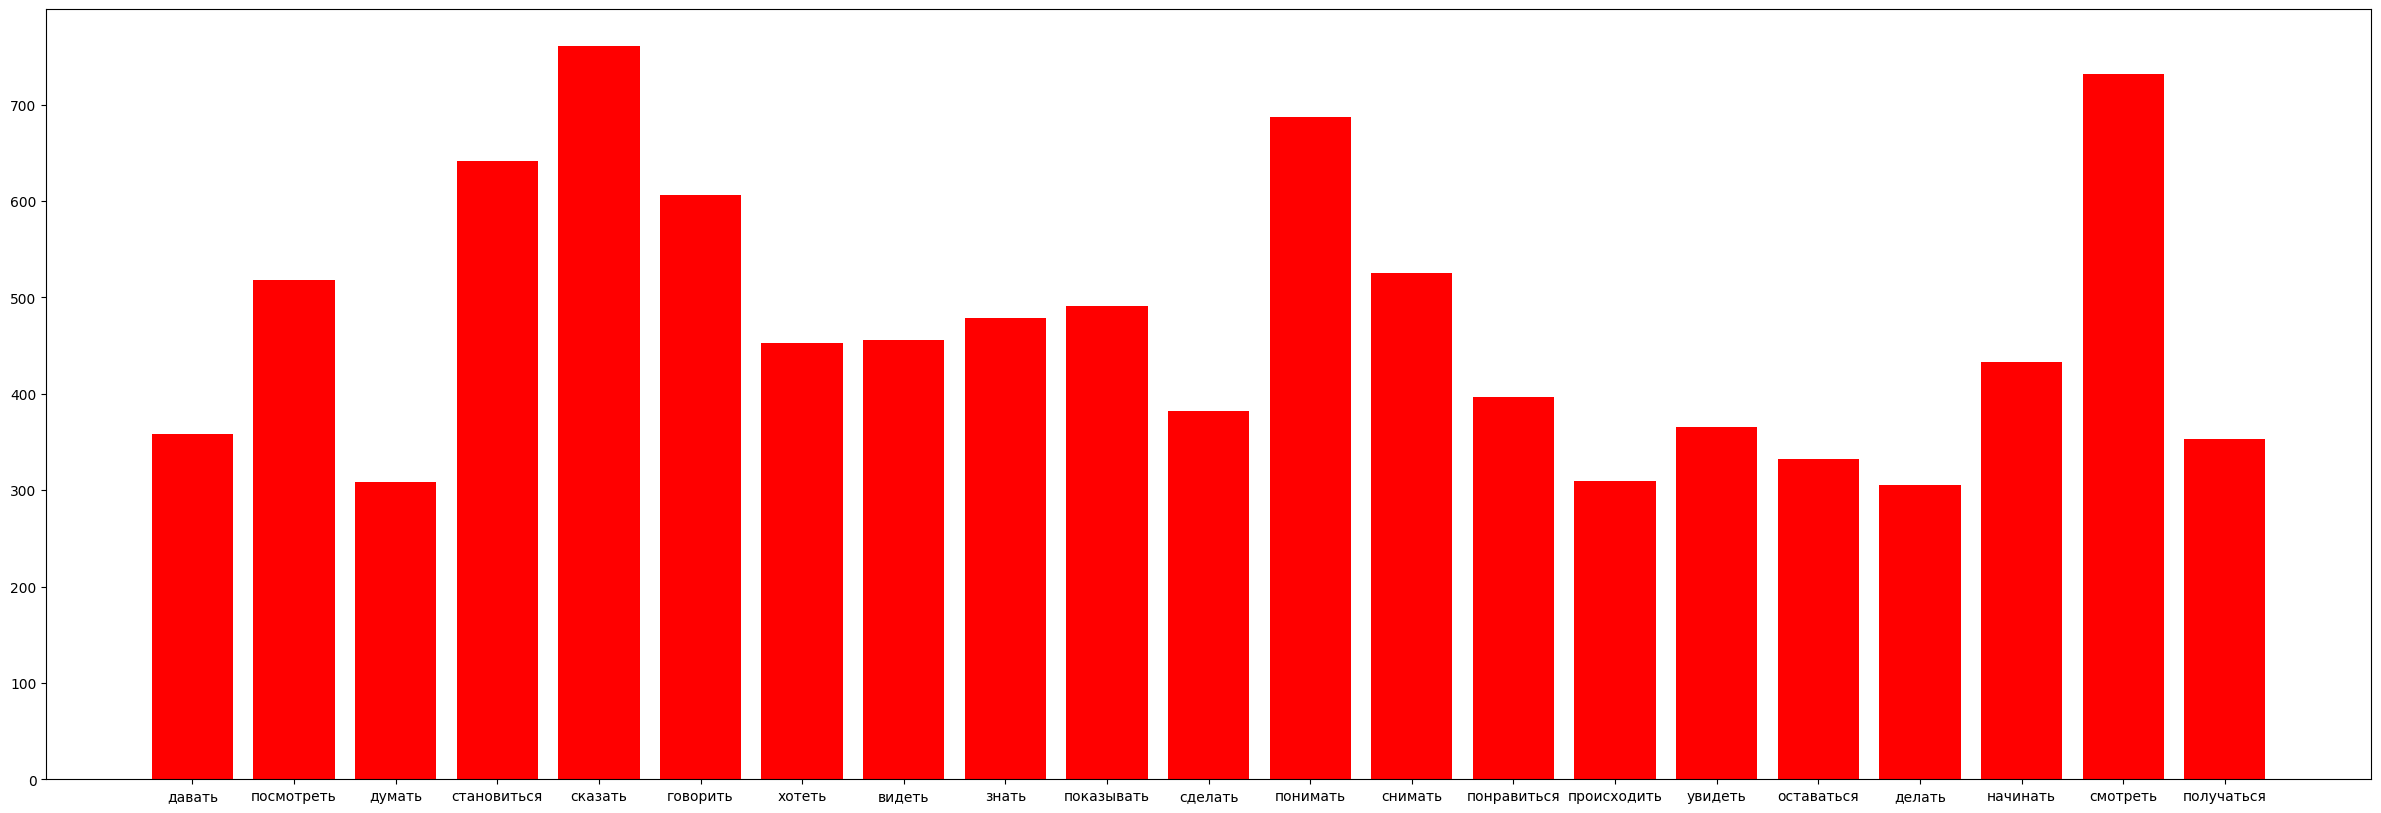

In [24]:
word_dict = Counter(output_lemma)
word_dict = dict(word_dict)
word_dict_upd = {}

bad_functors_pos = {'INTJ', 'PRCL', 'CONJ', 'PREP', 'NPRO'}
bad_words = {'этот', 'мой', 'наш', 'один', 'который', 'весь','быть', 'сей', 'свой', 'такой', 'тот', 'первый', 'сам', 'самый'}
good_functors_pos = {'ADJS', 'ADJF'}
verb_functors_pos = {'VERB', 'INFN'}

for key, value in word_dict.items(): 
    main.pos(key)   
    if value > 300 and  main.pos(key) in verb_functors_pos and key != ' ' and key not in bad_words:
        word_dict_upd[key] = value


fig = plt.figure(figsize=(30,10))
ax = fig.add_subplot()

ax.bar(list(word_dict_upd.keys()), word_dict_upd.values(), color='r')

plt.show()